In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from glob import glob
import matplotlib.pyplot as plt

In [15]:
list_efo = glob('../Files/*efo*/*err.asci')
list_efo

['../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201116_Gr13_Free_slit1.0_59235_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201120_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201122_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201208_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20201215_Gr11_Free_slit1.0_59229_1_err.asci',
 '../Files/at2020zso_efosc2_charlotte/tAT2020zso_20210510_Gr13_Free_slit1.0_59346_1_err.asci']

In [16]:
with fits.open(list_efo[0]) as hdul1:
    #print(hdul1[0].data[1][0])
    #print(hdul1[0].header)
    #print(hdul1[0].data.shape)
    z = 0.0563
    header = hdul1[0].header
    N = hdul1[0].data.shape[2]
    wavemin = header['WAVELMIN']
    wavemax = header['WAVELMAX']
    array = np.linspace(wavemin, wavemax, N)
    spec = hdul1[0].data[1][0]
    plt.plot(array, spec/(1+z))

OSError: No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True

In [4]:
list_not = glob('Files/*not*/*.ascii')
list_not

['Files/at2020zso_not_charlotte/AT2020zso_coadd.ascii',
 'Files/at2020zso_not_charlotte/spec1d_ALDl170107-AT2020zso_ALFOSC_2020Dec17T193228.675.ascii',
 'Files/at2020zso_not_charlotte/spec1d_ALDl170108-AT2020zso_ALFOSC_2020Dec17T194738.999.ascii',
 'Files/at2020zso_not_charlotte/spec1d_ALDl170113-SP2317-054_ALFOSC_2020Dec17T200105.747.ascii']

In [5]:
def plot_spectrum(file):
    z = 0.0563
    with fits.open(file) as hdul:
        wl = hdul[1].data['SIMPLE']
        flux = hdul[1].data['TRUE'] * 0.01*1e-29 * 2.99e14 / wl**2
    
    plt.plot(wl/(1+z), flux)
    plt.title('Spetrum of AT2020zso')
    plt.ylim(0, )
    plt.xlabel('$\lambda$ ($\AA$)')
    plt.ylabel('f$_{\lambda}\ ($erg/cm$^2$/s/$\AA$)')
    plt.show()

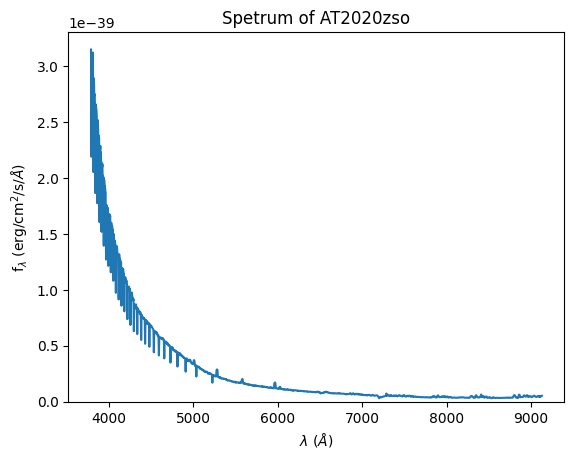

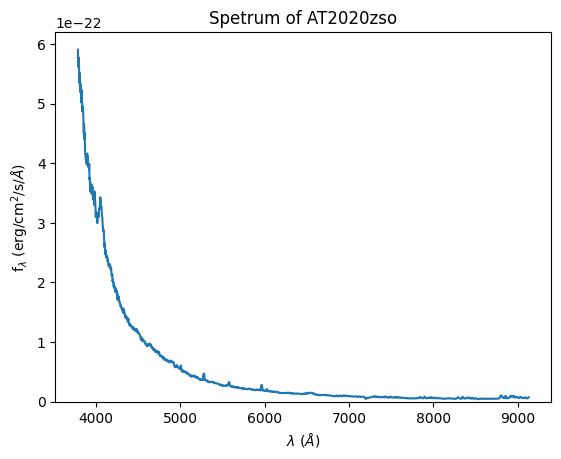

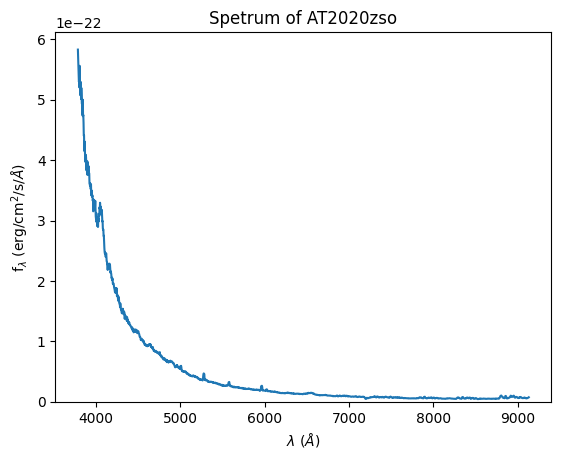

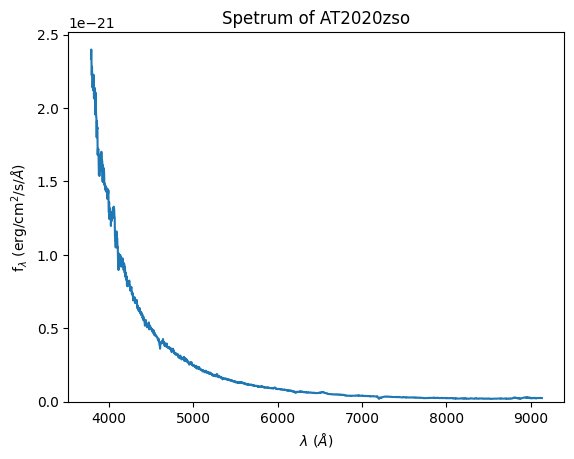

In [8]:
for i, file in enumerate(list_not):
    table = Table.read(file, format='ascii')
    spectrum = table.write('at2020zso_' + str(i) + '.fits', format='fits', overwrite=True)
    plot_spectrum('at2020zso_' + str(i) + '.fits')

In [7]:
Table.read(list_not[0], format='ascii')

SIMPLE,=,True
float64,float64,float64
4002.0318622050745,3.880696189202822e-14,1.6860378049275836e-15
4006.631352428311,3.787010528028838e-14,1.1756251649929338e-15
4011.222137449118,4.0269182141788916e-14,1.6618176397770187e-15
4014.2881077166985,4.152925191016356e-14,1.6702030233022022e-15
4017.3552984969674,3.983671525361883e-14,1.640409844703718e-15
4020.4238367005564,3.766256810692523e-14,1.6042910521834712e-15
4023.493657807882,4.3710623608827005e-14,1.6895794632519038e-15
4026.5649284589344,4.246998334752468e-14,1.638641506526719e-15
4031.1792780865117,3.904748483292848e-14,1.11567997057414e-15
